# **Project Name: Mobile Price Range Prediction**

**Business Context**

In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.

**Data information**

Battery_power - Total energy a battery can store in one time measured in mAh

Blue - Has bluetooth or not

Clock_speed - speed at which microprocessor executes instructions

Dual_sim - Has dual sim support or not

Fc - Front Camera mega pixels

Four_g - Has 4G or not

Int_memory - Internal Memory in Gigabytes

M_dep - Mobile Depth in cm

Mobile_wt - Weight of mobile phone

N_cores - Number of cores of processor

Pc - Primary Camera mega pixels

Px_height - Pixel Resolution Height

Px_width - Pixel Resolution Width

Ram - Random Access Memory in Mega

Touch_screen - Has touch screen or not

Sc_h - Screen Height of mobile in cm

Sc_w - Screen Width of mobile in cm

Talk_time - longest time that a single battery charge will last over a call

Three_g - Has 3G or not

Wifi - Has wifi or not

Price_range - This is the target variable with value of 0(Cheap), 1(Mid range smartphone),2(High Mid range smartphone) and 3(Expensive Phones)

**Github link:**

https://github.com/ganeshhegde48/classification-python-project

In [2]:
#importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score,classification_report


import warnings
warnings.filterwarnings('ignore')

# Loading the Dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# loading data set
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/eda/data_mobile_price_range.csv')

In [5]:
df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [6]:
df.shape

(2000, 21)

In [7]:
#checking for null values
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

There are no null values


# Data Insights

In [8]:
#overview of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [9]:
df.describe().T

count        mean          std    min      25%     50%  \
battery_power  2000.0  1238.51850   439.418206  501.0   851.75  1226.0   
blue           2000.0     0.49500     0.500100    0.0     0.00     0.0   
clock_speed    2000.0     1.52225     0.816004    0.5     0.70     1.5   
dual_sim       2000.0     0.50950     0.500035    0.0     0.00     1.0   
fc             2000.0     4.30950     4.341444    0.0     1.00     3.0   
four_g         2000.0     0.52150     0.499662    0.0     0.00     1.0   
int_memory     2000.0    32.04650    18.145715    2.0    16.00    32.0   
m_dep          2000.0     0.50175     0.288416    0.1     0.20     0.5   
mobile_wt      2000.0   140.24900    35.399655   80.0   109.00   141.0   
n_cores        2000.0     4.52050     2.287837    1.0     3.00     4.0   
pc             2000.0     9.91650     6.064315    0.0     5.00    10.0   
px_height      2000.0   645.10800   443.780811    0.0   282.75   564.0   
px_width       2000.0  1251.51550   432.199447  500.0   874.75  1247.0   
ram            2000.0  2124.21300  1084.732044  256.0  1207.50  2146.5   
sc_h           2000.0    12.30650     4.213245    5.0     9.00    12.0   
sc_w           2000.0     5.76700     4.356398    0.0     2.00     5.0   
talk_time      2000.0    11.01100     5.463955    2.0     6.00    11.0   
three_g        2000.0     0.76150     0.426273    0.0     1.00     1.0   
touch_screen   2000.0     0.50300     0.500116    0.0     0.00     1.0   
wifi           2000.0     0.50700     0.500076    0.0     0.00     1.0   
price_range    2000.0     1.50000     1.118314    0.0     0.75     1.5   

                   75%     max  
battery_power  1615.25  1998.0  
blue              1.00     1.0  
clock_speed       2.20     3.0  
dual_sim          1.00     1.0  
fc                7.00    19.0  
four_g            1.00     1.0  
int_memory       48.00    64.0  
m_dep             0.80     1.0  
mobile_wt       170.00   200.0  
n_cores           7.00     8.0  
pc               15.00    20.0  
px_height       947.25  1960.0  
px_width       1633.00  1998.0  
ram            3064.50  3998.0  
sc_h             16.00    19.0  
sc_w              9.00    18.0  
talk_time        16.00    20.0  
three_g           1.00     1.0  
touch_screen      1.00     1.0  
wifi              1.00     1.0  
price_range       2.25     3.0

# EDA

In [10]:
#combining two features and creating a new feature
df['Pixels dimension']= df['px_height']* df['px_width']
df['Screen Dimension'] = df['sc_h']* df['sc_w']

# dropping columns those are less useful
df.drop(columns=['px_height', 'px_width','sc_h','sc_w'],inplace=True)

In [11]:
# we will rename the column names for better usage and understanding
df.rename(columns={'battery_power':'Battery','blue':'Bluetooth','clock_speed':'Clock_Speed','dual_sim':'Dual_Sim','fc':'Front_Camera','four_g':'4G','int_memory':'Rom','m_dep':'Mobile_Depth','mobile_wt':'Mobile_weight',
                   'n_cores':'Number_of_cores','pc':'Primary_Camera','ram':'Ram','talk_time':'Talk_Time','three_g':'3G','touch_screen':'Touch_Screen','wifi':'Wi-Fi','price_range':'Price_range'},inplace=True)

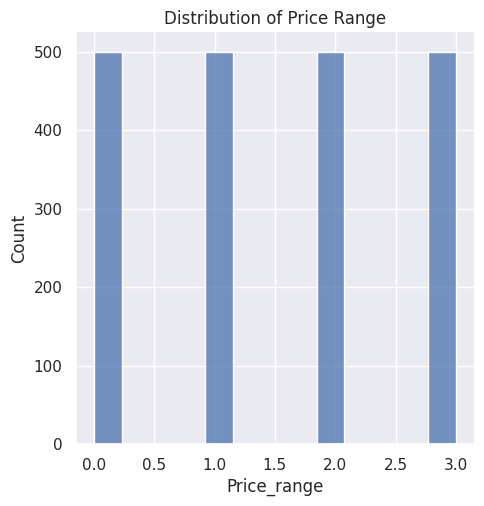

In [12]:
#distribution of price range
sns.set(rc={'figure.figsize':(6,6)})
ax=sns.displot(df["Price_range"])
plt.title('Distribution of Price Range')
plt.show()

There are 4 different price ranges, each with count of 500.

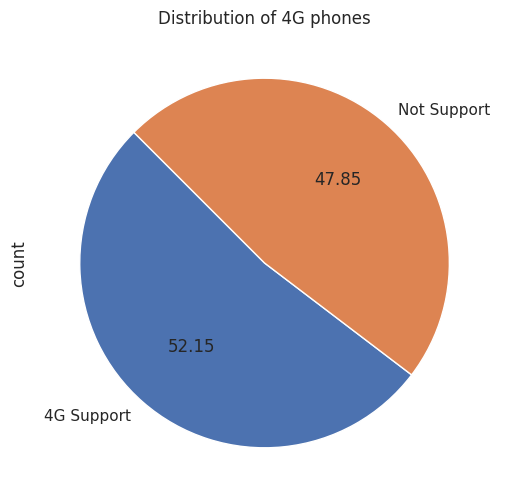

In [13]:
#distribution of 4G phones
plt.title('Distribution of 4G phones')
df['4G'].value_counts().plot(kind='pie',autopct='%.2f',labels=['4G Support','Not Support'],startangle=135)
plt.show()

Over half of the mobiles support 4G.

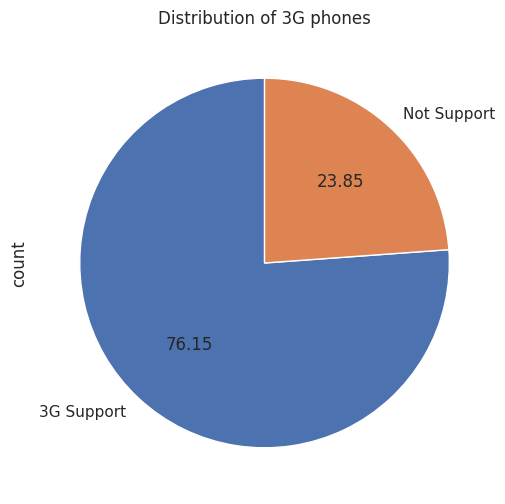

In [14]:
# distribution of 3G phones
plt.title('Distribution of 3G phones')
df['3G'].value_counts().plot(kind='pie',autopct='%.2f',labels=['3G Support','Not Support'],startangle=90)
plt.show()

Only around 24% of mobiles dont support 3G.

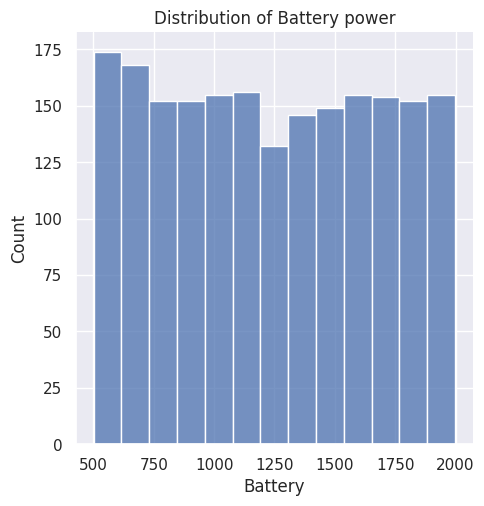

In [15]:
sns.set(rc={'figure.figsize':(6,6)})
ax=sns.displot(df["Battery"])
plt.title('Distribution of Battery power')
plt.show()

we have a wide range of battery capacity mobiles from 500 to 2000 mah.

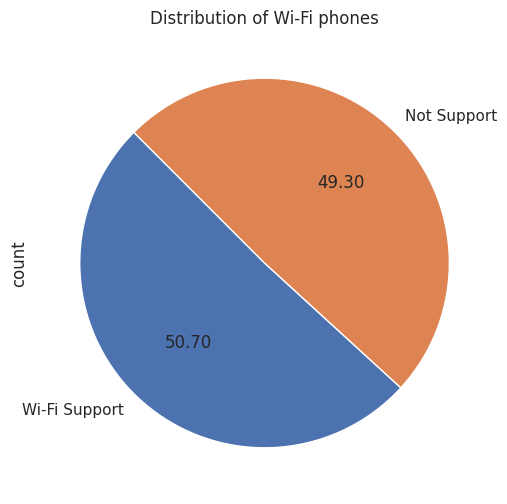

In [16]:
# distribution of Wi-Fi supporting phones
plt.title('Distribution of Wi-Fi phones')
df['Wi-Fi'].value_counts().plot(kind='pie',autopct='%.2f',labels=['Wi-Fi Support','Not Support'],startangle=135)
plt.show()

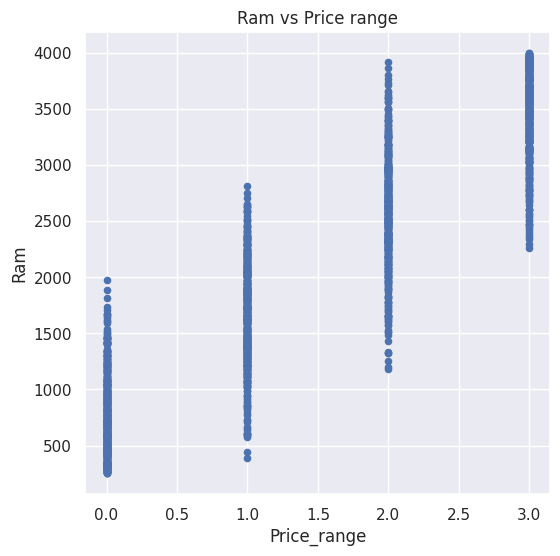

In [17]:
# price distribution based on Ram
df.plot(x='Price_range',y='Ram',kind='scatter')
plt.title('Ram vs Price range')
plt.show()

As the Ram capacity increases the price range of the mobile also increases

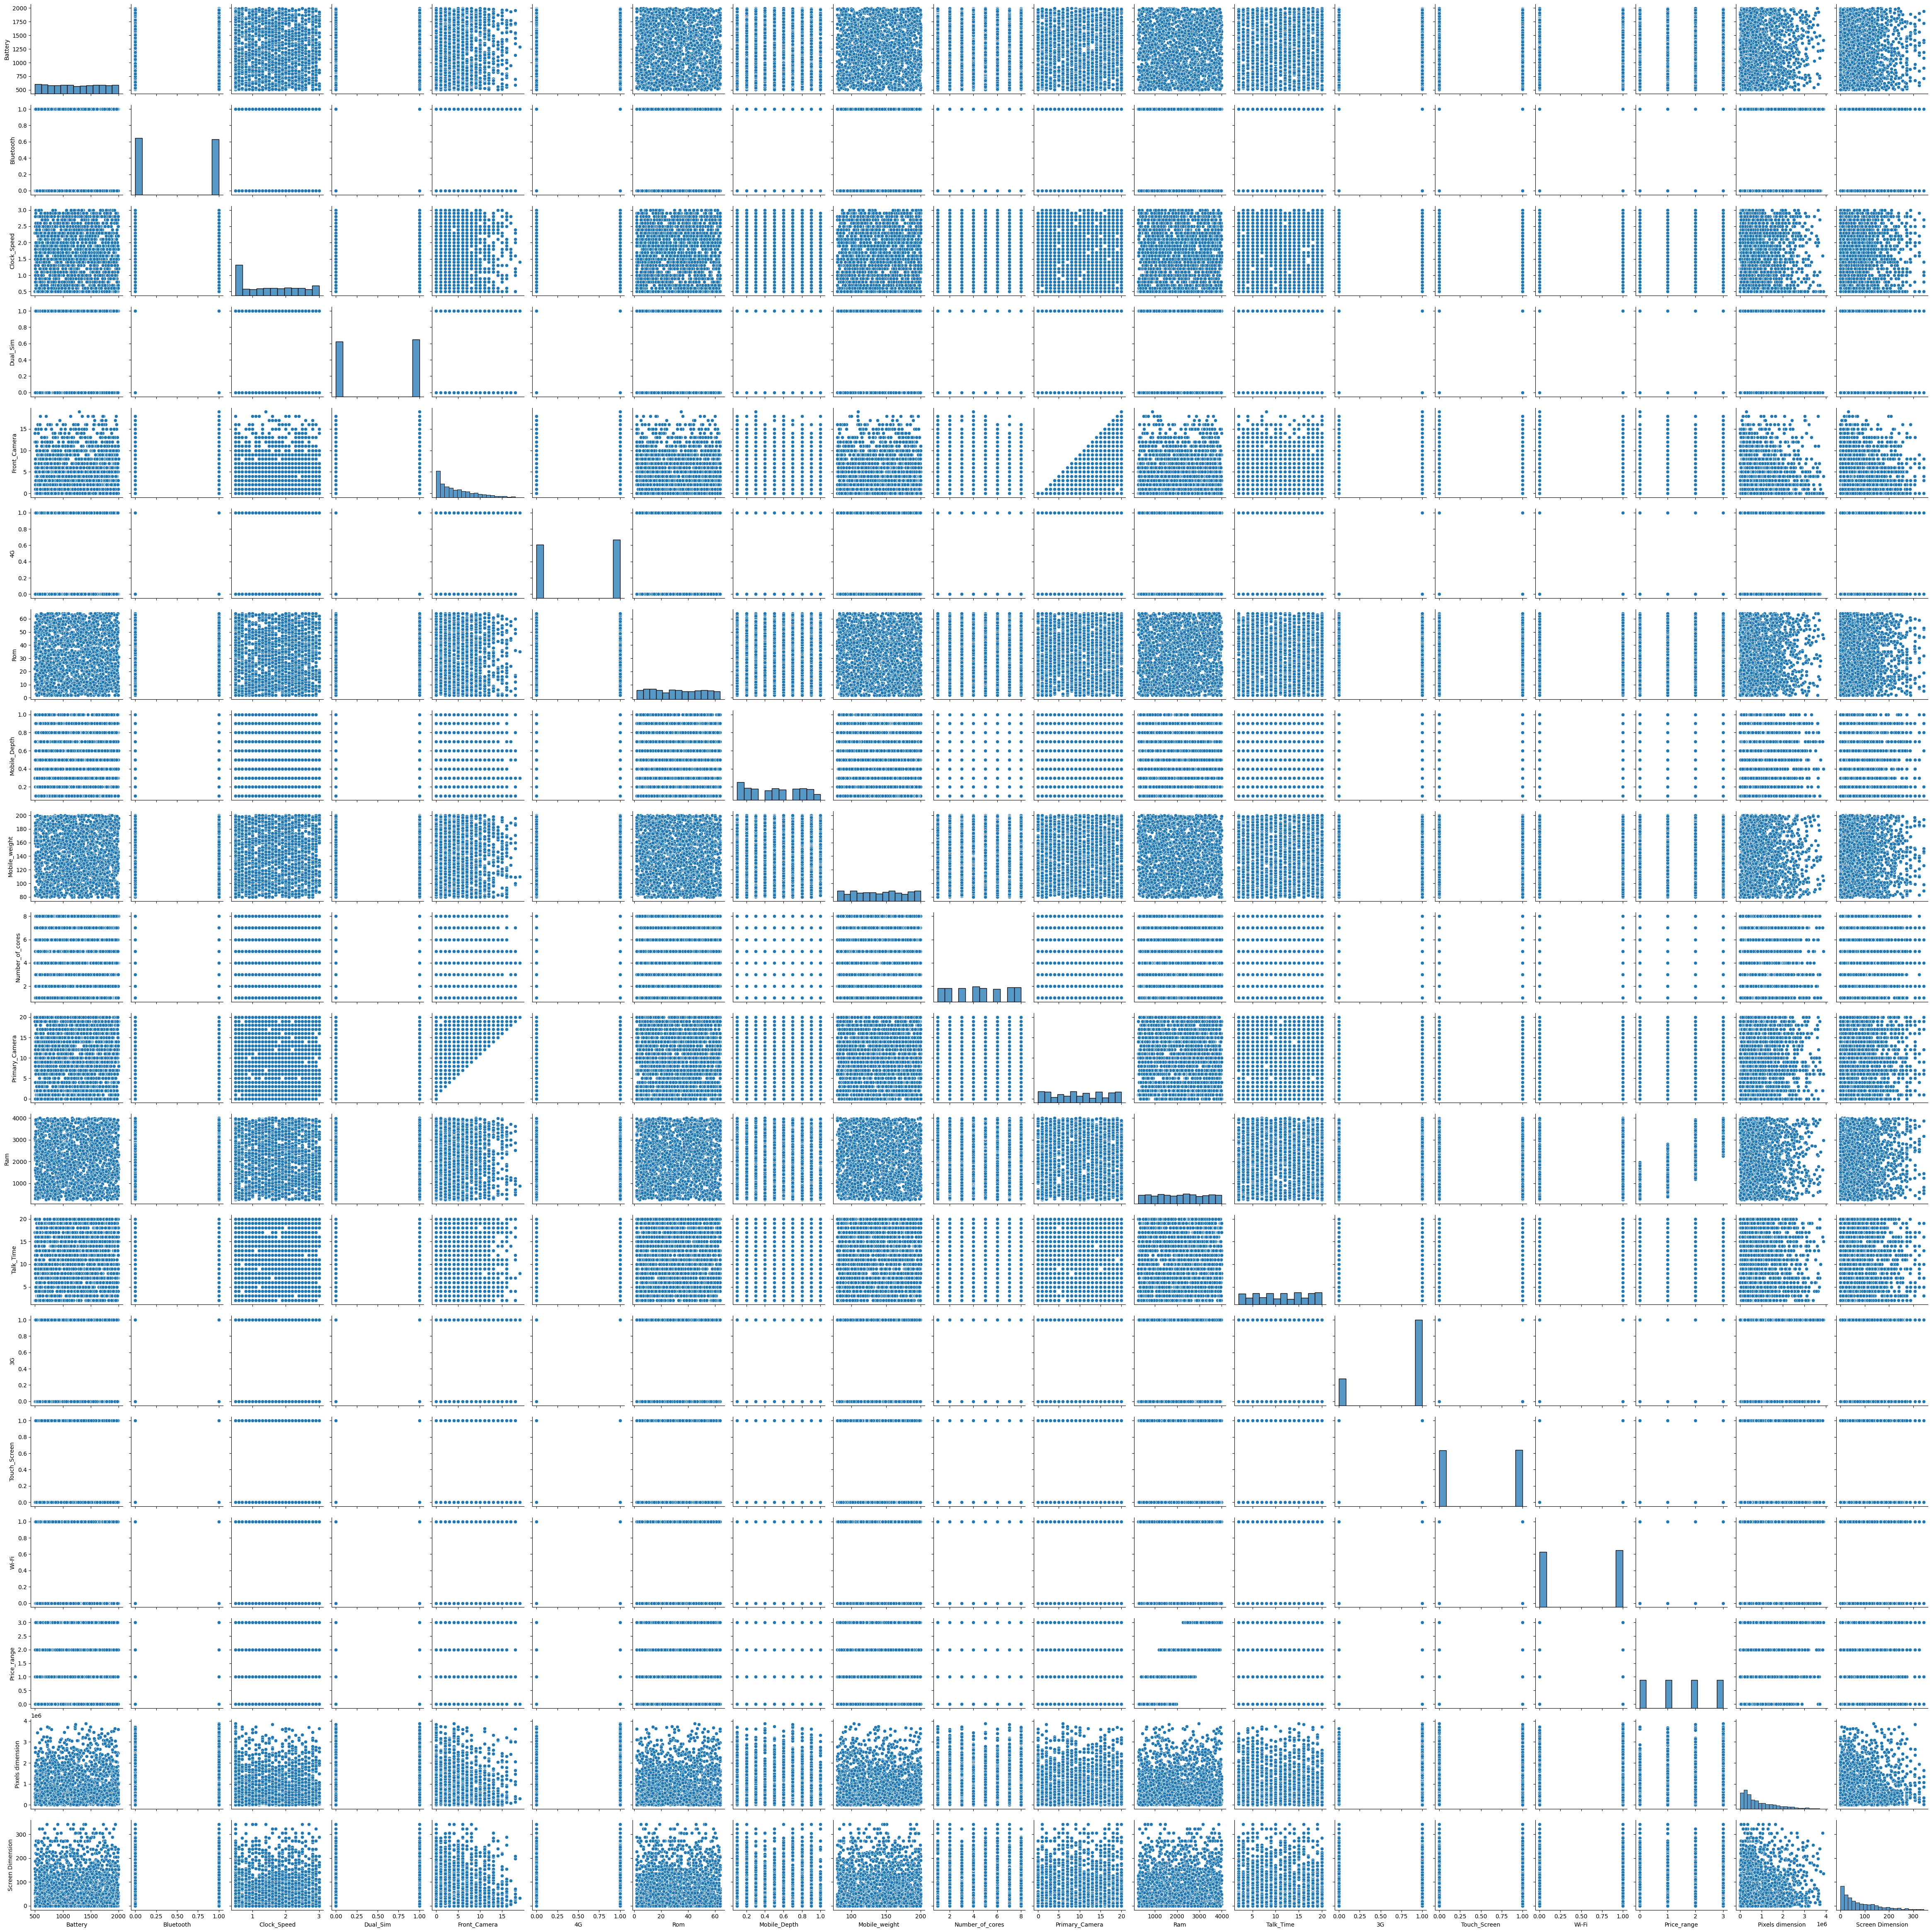

In [ ]:
sns.pairplot(df)

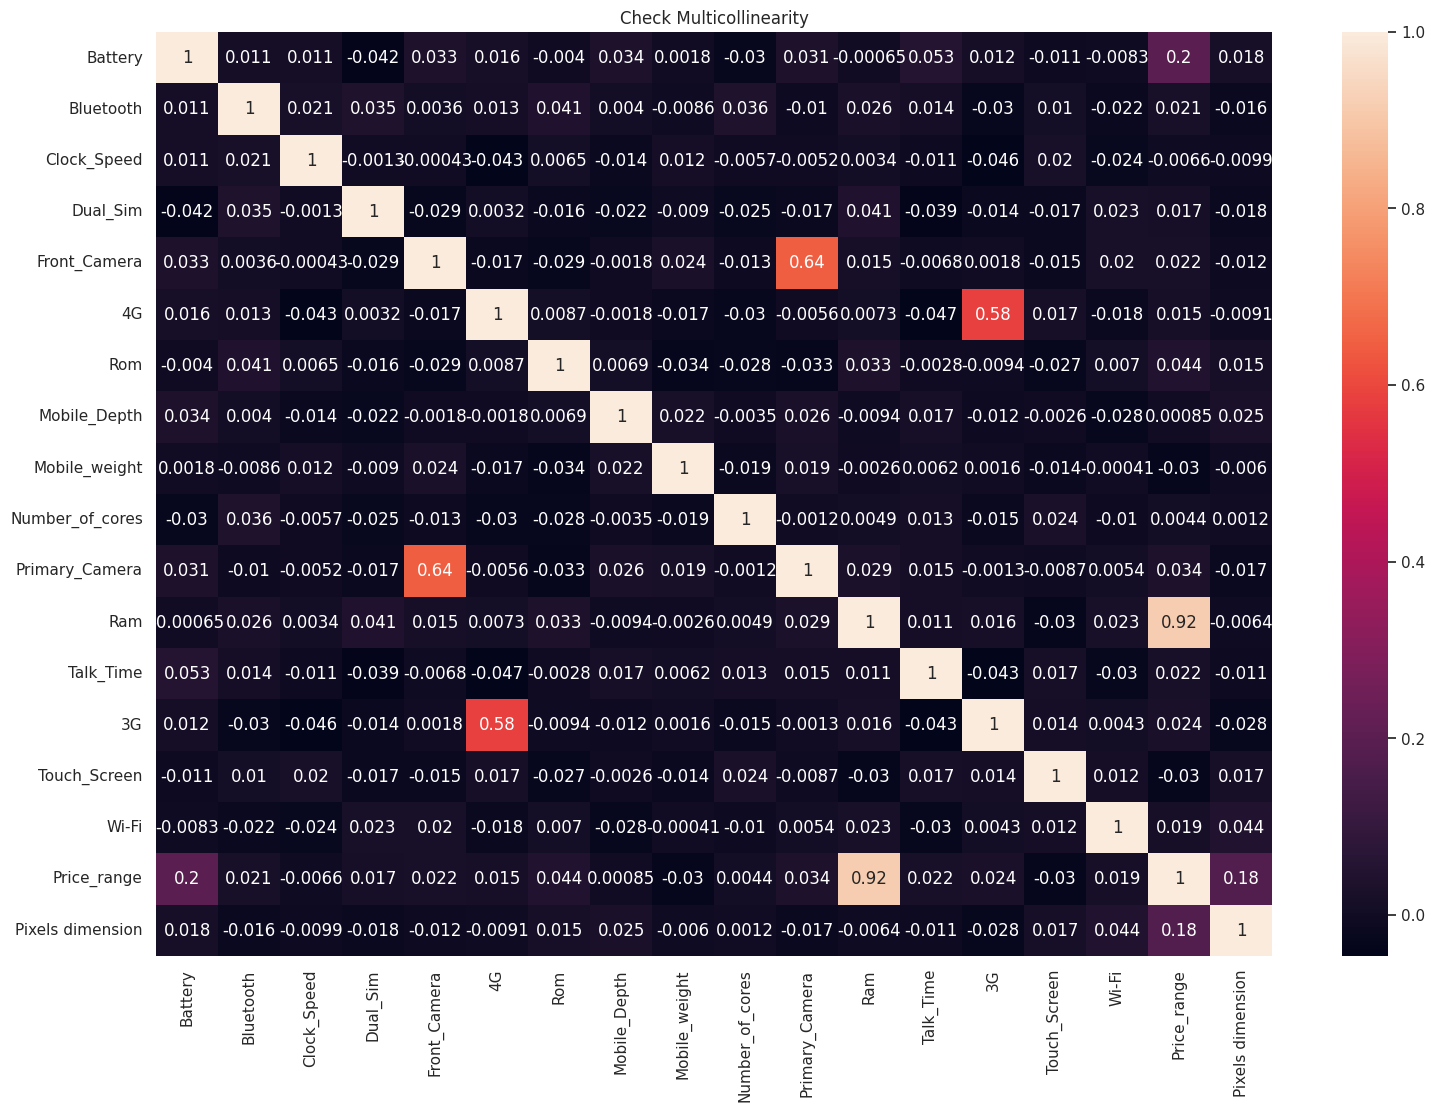

In [ ]:
# Multicollinearity
plt.figure(figsize=(18,12))
plt.title('Check Multicollinearity')
sns.heatmap(df.iloc[:,0:-1].corr(),annot=True)
plt.show()

# **Data Processing and Data Splitting**

In [ ]:
# separating the target variable and independent variable
dependent_variable ='Price_range'
independent_variable = list(set(df.columns.tolist())-{dependent_variable})

In [ ]:
x = df[independent_variable].values
y = df[dependent_variable].values

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0,stratify=y)

In [ ]:
stand = StandardScaler()

In [ ]:
x_train = stand.fit_transform(x_train)
x_test = stand.transform(x_test)

# **MODEL IMPLIMENTATION**

# M1 - Support Vector Machine

In [ ]:
#setting paramaters
svc_params = {'C':range(5,10,2),
              'kernel' :['rbf', 'linear', 'poly', 'sigmoid']}

In [ ]:
#hyperparameter tunning and training the model
svc_cv  = GridSearchCV(SVC(),param_grid=svc_params,cv=5,verbose=True,scoring='accuracy',n_jobs=-1)
svc_cv.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': range(5, 10, 2),
                         'kernel': ['rbf', 'linear', 'poly', 'sigmoid']},
             scoring='accuracy', verbose=True)

In [ ]:
# selecting the best paramaters
svc_cv.best_params_

{'C': 5, 'kernel': 'linear'}

In [ ]:
# training the model
scv =SVC(C=5,kernel='linear')
scv.fit(x_train,y_train)

SVC(C=5, kernel='linear')

In [ ]:
# model prediction
scv_pred = scv.predict(x_test)

#checking the accuracy
scv_accuracy = accuracy_score(scv_pred,y_test)
scv_accuracy

0.936

In [ ]:
# confusion matrix
def conf(x,y):
  sns.heatmap(confusion_matrix(x,y_test),annot=True)
  plt.title(y)
  plt.show()

def classi(x,y):
  print(y)
  print(classification_report(x,y_test))

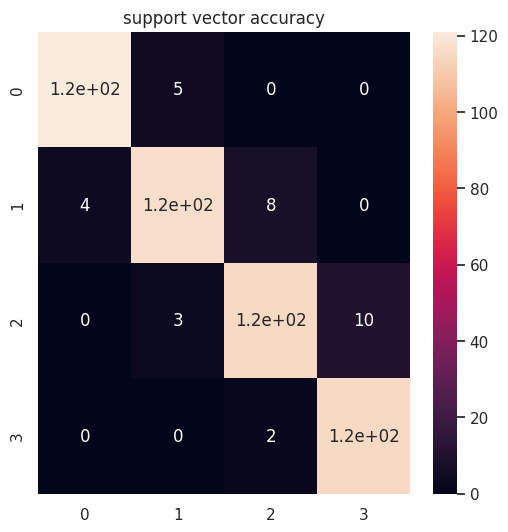

In [ ]:
conf(scv_pred,'support vector accuracy')

In [ ]:
classi(scv_pred,'support vector accuracy')

support vector accuracy
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       126
           1       0.94      0.91      0.92       129
           2       0.92      0.90      0.91       128
           3       0.92      0.98      0.95       117

    accuracy                           0.94       500
   macro avg       0.94      0.94      0.94       500
weighted avg       0.94      0.94      0.94       500



# M2 - K Nearest Neighbors

In [ ]:
# finding the value of k
error=[]
for i in range(1,1000):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  knn_pred = knn.predict(x_test)
  error.append(np.mean(knn_pred!=y_test))

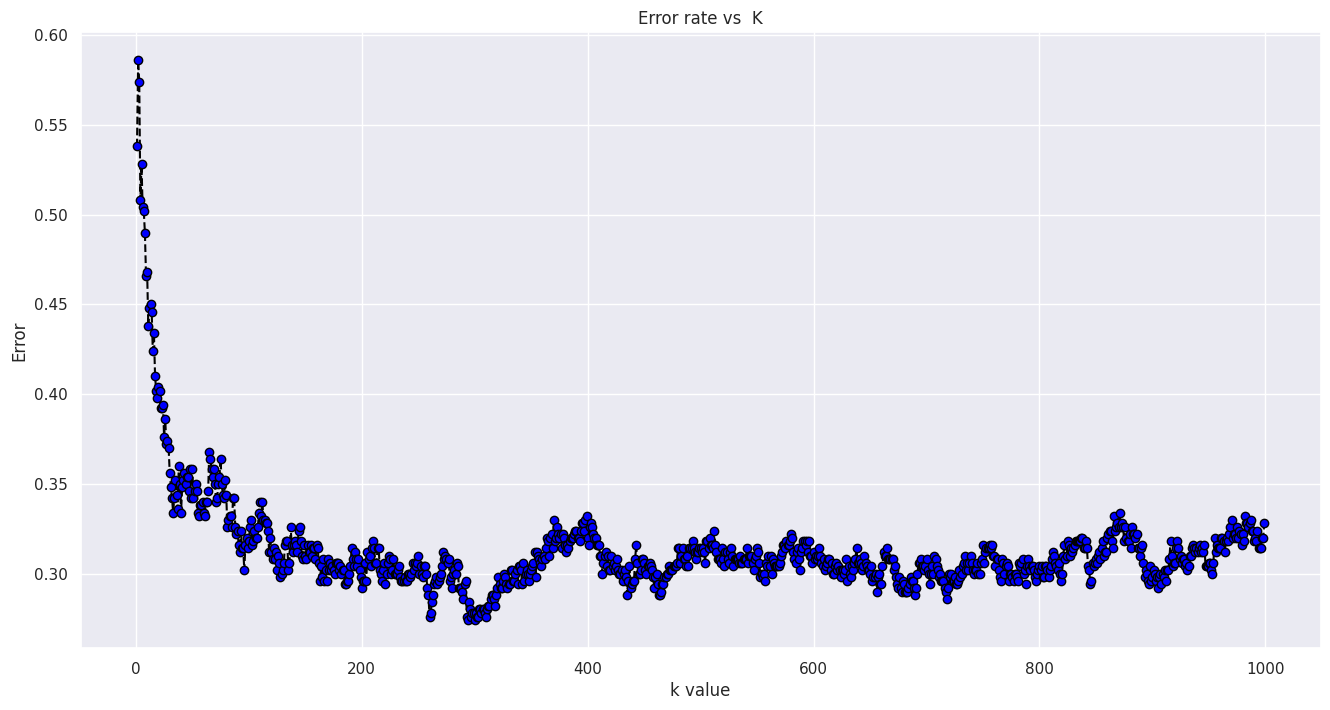

minimum error  0.274 at the value of k = 294


In [ ]:
#plotting the graph
plt.figure(figsize=(16,8))
plt.plot(range(1,1000),error,color='black',linestyle='dashed',marker='o',markerfacecolor='blue')
plt.title('Error rate vs  K')
plt.xlabel('k value')
plt.ylabel('Error')
plt.show()
print("minimum error ",min(error),"at the value of k =",error.index(min(error))+1)

In [ ]:
# created an object for KNN
knn = KNeighborsClassifier(n_neighbors=294,p=1,weights='distance',metric= 'manhattan')

In [ ]:
#training the model
knn.fit(x_train,y_train)


KNeighborsClassifier(metric='manhattan', n_neighbors=294, p=1,
                     weights='distance')

In [ ]:
# model prediction
knn_pred = knn.predict(x_test)

# checking accuracy
knn_accuracy = accuracy_score(knn_pred,y_test)
knn_accuracy

0.75

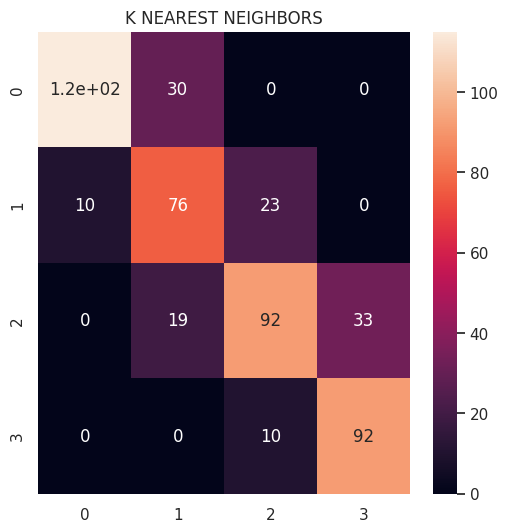

In [ ]:
conf(knn_pred,'K NEAREST NEIGHBORS')

In [ ]:
classi(knn_pred,'K NEAREST NEIGHBORS')


K NEAREST NEIGHBORS
              precision    recall  f1-score   support

           0       0.92      0.79      0.85       145
           1       0.61      0.70      0.65       109
           2       0.74      0.64      0.68       144
           3       0.74      0.90      0.81       102

    accuracy                           0.75       500
   macro avg       0.75      0.76      0.75       500
weighted avg       0.76      0.75      0.75       500



# M3 - XgBoost

In [ ]:
# seting the parameters
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
  "min_child_weight" : [ 1, 3, 5, 7 ],
  "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]

 }

In [ ]:
#hypermeter tunning and training the model
xgb= XGBClassifier()


random_search= RandomizedSearchCV(xgb,param_distributions=params,n_iter=5,scoring='accuracy',n_jobs=-1,cv=5,verbose=3)
random_search.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='accuracy', verbose=3)

In [ ]:
# selecting the best params
random_search.best_params_

{'min_child_weight': 5,
 'max_depth': 10,
 'learning_rate': 0.15,
 'gamma': 0.1,
 'colsample_bytree': 0.5}

In [ ]:
# best estimator
random_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
#model prediction
xgb_pred = random_search.predict(x_test)

In [ ]:
#checking the accuracy
xg_boost_accuracy = accuracy_score(xgb_pred,y_test)
xg_boost_accuracy

0.886

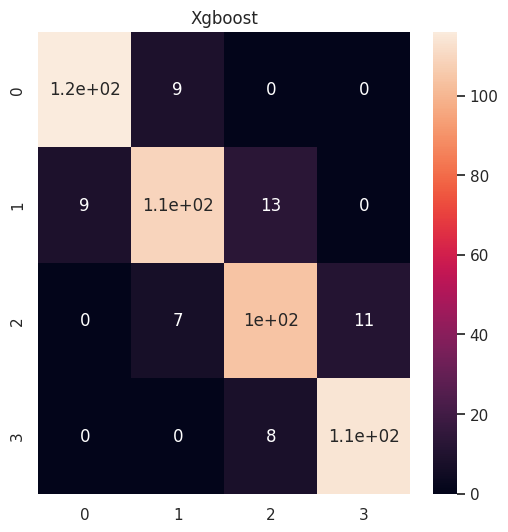

In [ ]:
conf(xgb_pred,'Xgboost')

In [ ]:
classi(xgb_pred,'Xgboost')

Xgboost
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       125
           1       0.87      0.83      0.85       131
           2       0.83      0.85      0.84       122
           3       0.91      0.93      0.92       122

    accuracy                           0.89       500
   macro avg       0.89      0.89      0.89       500
weighted avg       0.89      0.89      0.89       500



# M4 - Stacking

In [ ]:
# setting base models and final estimator
estimators = [('gbc',GradientBoostingClassifier()),('xgb',XGBClassifier(colsample_bytree=0.7, gamma=0.3, learning_rate=0.25, max_depth=15,
              min_child_weight=3, objective='multi:softprob')),
       ('bc',BaggingClassifier(base_estimator= SVC(C= 5, kernel= 'linear'),
 bootstrap= True,
 bootstrap_features= True,
 max_features= 1.0,
 max_samples= 0.8,
 n_estimators= 20))]

In [ ]:
# hyperparameter tunning
sc= StackingClassifier(estimators=estimators,passthrough=True,n_jobs=-1)

In [ ]:
#training model
sc.fit(x_train,y_train)

StackingClassifier(estimators=[('gbc', GradientBoostingClassifier()),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=0.7, device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=0.3,
                                              grow_policy=None,
                                              importance_type=None,
                                              int...
                                              max_delta_step=None, max_depth=15,
                                              max_leaves=None,
                                              min_child_weight=3, missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              objective='multi:softprob', ...)),
                               ('bc',
                                BaggingClassifier(base_estimator=SVC(C=5,
                                                                     kernel='linear'),
                                                  bootstrap_features=True,
                                                  max_samples=0.8,
                                                  n_estimators=20))],
                   n_jobs=-1, passthrough=True)

In [ ]:
#model prediction
sc_pred = sc.predict(x_test)

In [ ]:
# checking accuracy
sc_accuracy=accuracy_score(sc_pred,y_test)
sc_accuracy

0.932

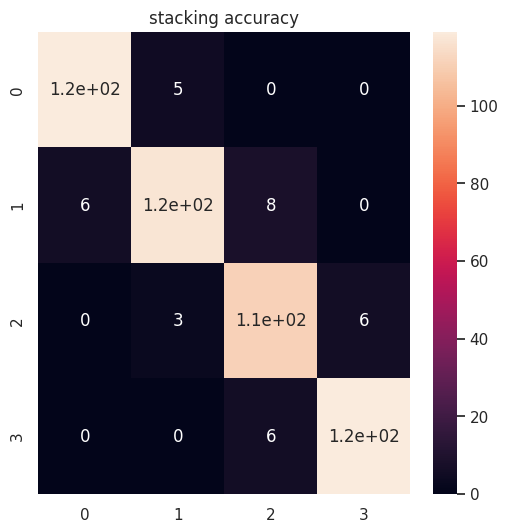

In [ ]:
conf(sc_pred, 'stacking accuracy')

In [ ]:
classi(sc_pred, 'stacking')

stacking
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       124
           1       0.94      0.89      0.91       131
           2       0.89      0.93      0.91       120
           3       0.95      0.95      0.95       125

    accuracy                           0.93       500
   macro avg       0.93      0.93      0.93       500
weighted avg       0.93      0.93      0.93       500



# M5 - Naive Bayes

In [ ]:
# creating an object for GaussianNB
nb = GaussianNB()

In [ ]:
# training the model
nb.fit(x_train,y_train)

GaussianNB()

In [ ]:
#model prediction
nb_pred = nb.predict(x_test)

#checking the accuracy
nb_accuracy = accuracy_score(nb_pred,y_test)
nb_accuracy

0.808

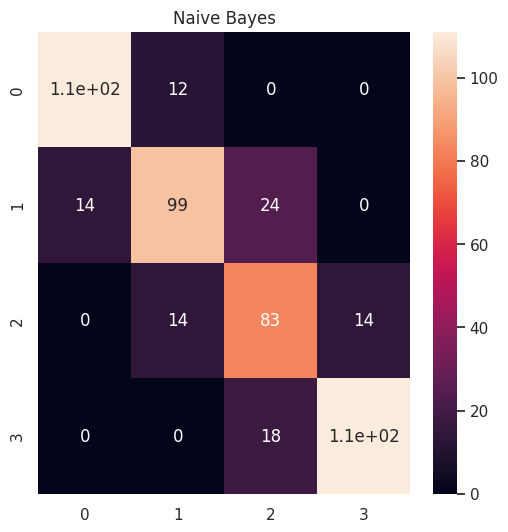

In [ ]:
conf(nb_pred,'Naive Bayes')

In [ ]:
classi(nb_pred,'Naive Bayes')

Naive Bayes
              precision    recall  f1-score   support

           0       0.89      0.90      0.90       123
           1       0.79      0.72      0.76       137
           2       0.66      0.75      0.70       111
           3       0.89      0.86      0.87       129

    accuracy                           0.81       500
   macro avg       0.81      0.81      0.81       500
weighted avg       0.81      0.81      0.81       500



# EVALUATION

In [ ]:
#set all the accuracy in data frame
evaluation = pd.DataFrame(data={'Model':['KNN classifier','Naive Bays','xgboost','Support Vector Machine','Stacking'], 'accuracy':[knn_accuracy,nb_accuracy,xg_boost_accuracy,scv_accuracy,sc_accuracy]})


In [ ]:
# sorting
evaluation=evaluation.sort_values(by=['accuracy'],ascending=False).reset_index(drop=True)
evaluation

Model  accuracy
0  Support Vector Machine     0.936
1                Stacking     0.932
2                 xgboost     0.886
3              Naive Bays     0.808
4          KNN classifier     0.752

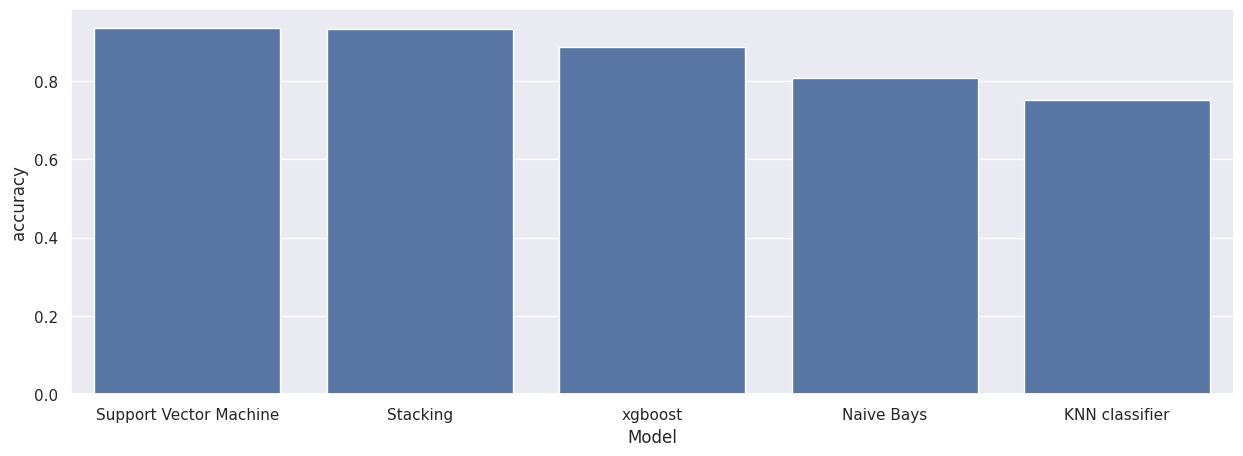

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x='Model',y='accuracy',data = evaluation)
plt.show()

# Conclusion

From EDA we can see that here are mobile phones in 4 price ranges with count of 500 per range

As there is increase in camera, battery and RAM, even the price of the mobile increases

So RAM, battery power, pixels play more significant role in deciding the price range of mobile phone.

From all the above models, we can say that Support Vector Machine model predicts the price range more accurately